In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img1 = cv2.imread("brd.jpeg")
img3 = cv2.imread("flock3.jpeg")
img2= cv2.imread("flock2.jpeg")

In [6]:

if (img.shape[:2])==(126,189):
    v=1
if (img.shape[:2])==(183, 275):
    v=2
if (img.shape[:2])==(168, 300):
    v=3

Label 	Largest side
    1          1.000
    2         66.000
    3          1.000
    4        120.000
    5         79.000
    6        102.000
    7        125.000
    8        105.000
    9         83.000
   10         80.000
   11         77.000
   12         85.000
   13         81.000
   14          1.000
   15        104.000
   16         74.000
   17          1.000
   18        119.000
   19        114.000
   20        119.000
   21         19.000
   22         91.000
   23         25.000
   24         48.000
   25         76.000
   26         28.000
   28        100.000
   30        117.000
   31         39.000
   32        122.000
   33         53.000
   34          1.000
   35         85.000
   36        100.000
   37          1.000
   38        117.000
   39        102.000
   40         81.000
   41          1.000
   42        111.000
   43         56.000
   44         22.000
   45        111.000
   46        123.000
   47          1.000
   48          1.000
   50         

NameError: name 'blobs' is not defined

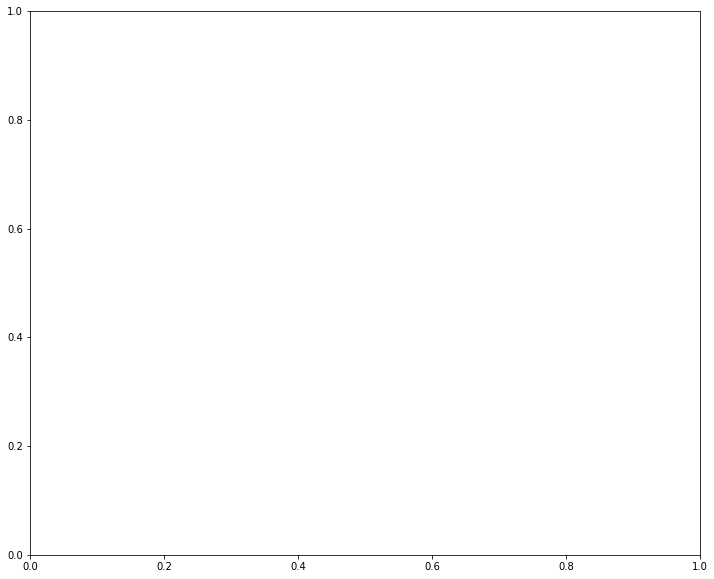

In [14]:
from skimage.measure import regionprops

img2= cv2.imread("flock2.jpeg",0)
labels=img2
properties = regionprops(labels)
print ('Label \tLargest side')
for p in properties:
    min_row, min_col, max_row, max_col = p.bbox
    print ('%5d %14.3f' % (p.label, max(max_row - min_row, max_col - min_col)))

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)    
ax.imshow(np.ma.masked_array(labels, ~blobs), cmap=plt.cm.gist_rainbow) 
ax.set_title('Labeled objects')
plt.xticks([])
plt.yticks([])
for ri, ci, li in zip(r, c, range(1, nlabels+1)):
    ax.annotate(li, xy=(ci, ri), fontsize=24)
plt.show()

In [ ]:
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

# generate some lowpass-filtered noise as a test image
gen = np.random.RandomState(0)
img = gen.poisson(2, size=(512, 512))
img = ndimage.gaussian_filter(img.astype(np.double), (30, 30))
img -= img.min()
img /= img.max()

# use a boolean condition to find where pixel values are > 0.75
blobs = img > 0.75

# label connected regions that satisfy this condition
labels, nlabels = ndimage.label(blobs)

# find their centres of mass. in this case I'm weighting by the pixel values in
# `img`, but you could also pass the boolean values in `blobs` to compute the
# unweighted centroids.
r, c = np.vstack(ndimage.center_of_mass(img, labels, np.arange(nlabels) + 1)).T

# find their distances from the top-left corner
d = np.sqrt(r*r + c*c)

# plot
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
ax[0].imshow(img)
ax[1].hold(True)
ax[1].imshow(np.ma.masked_array(labels, ~blobs), cmap=plt.cm.rainbow)
for ri, ci, di in zip(r, c, d):
    ax[1].annotate('', xy=(0, 0), xytext=(ci, ri),
                   arrowprops={'arrowstyle':'<-', 'shrinkA':0})
    ax[1].annotate('d=%.1f' % di, xy=(ci, ri),  xytext=(0, -5),
                   textcoords='offset points', ha='center', va='top',
                   fontsize='x-large')
for aa in ax.flat:
    aa.set_axis_off()
fig.tight_layout()
plt.show()

#link `https://stackoverflow.com/questions/38598690/how-to-find-the-diameter-of-objects-using-image-processing-in-python

In [ ]:
m=dist_transform.max()
row,col=dist_transform.shape
for x in range(row):
    for y in range(col):
        if dist_transform[x][y]==m:
            cv2.circle(IMG,(x,y),7,(0,255,0),-1)
            cv2.imwrite(nn,IMG)
plt.imshow(nn)   

In [ ]:
dist_transform=cv2.distanceTransform(thresh1,cv2.DIST_L2,5)
disp(dist_transform)

In [ ]:
kernel = np.ones((5,5), np.uint8) 
  
# The first parameter is the original image, 
# kernel is the matrix with which image is  
# convolved and third parameter is the number  
# of iterations, which will determine how much  
# you want to erode/dilate a given image.  
img_erosion = cv2.erode(img, kernel, iterations=1) 
img_dilation = cv2.dilate(img, kernel, iterations=3) 
  
cv2.imshow('Input', img) 
cv2.imshow('Erosion', img_erosion) 
cv2.imshow('Dilation', img_dilation) 
  
cv2.waitKey(0) 

In [ ]:
## threshold
th, threshed = cv2.threshold(gray, 100, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
## findcontours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]

In [ ]:
## filter by area
s1= 5
s2 = 50
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("Dots number: {}".format(len(xcnts)))
#Dots number: 23

In [ ]:
#cnts,hi = cv2.findContours(dist_transform, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]
contours, hierarchy = cv2.findcontours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)(dist_transform,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[4]
cv2.drawContours(IMG, [cnt], 0, (0,255,0), 3)
disp(IMG)